<figure>
<center>
<img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/inverted-tree-2015b-cathy-lindsey.jpg" width='500px'/>
</figure>




## Árvores de Decisão - AD






Árvores de decisão são classificadores supervisionados que operam sobre dados categóricos e contínuos. O modelo inclui uma estrutura com nodos e folhas. Cada nodo está atrelado a uma decisão.


Árvores de decisão são ótimos classificadores devido a sua estabilidade e precisão, além de serem fáceis de interpretar.


Por exemplo, se queremos construir uma árvore de decisão para identificar se irei à praia, observe o exemplo abaixo:

<figure>
<center>
<img src="https://didatica.tech/wp-content/uploads/2020/07/image-3.png" width='600px'/>
</figure>


Cada nó representa um aspecto. A cada nível da árvore um número substancial de possibilidade é cortado, aproximadamente metade. Isso acelera a identificação da classe.

O desafio está em identificar qual atributo será utilizado em cada nó, como critério. Por exemplo, porque não utilizar a *Humidade* e o *Vento* no primeiro nível?






##Como funciona a construção da AD









A ideia básica na construção de uma árvore de decisão  é a seguir:



1.   Selecione o melhor atributo (por exemplo, usando a entropia) para dividir os registros em subconjuntos;
2.   Use o atributo previamente selecionado para compor a árvore;
3.   Faça o processo 1 e 2 recursivamente até que uma das condições a seguir sejam alcançadam:
     - todas os registros no nó atual correspondem a mesma classe
     - Não restou atributos
     - Não tem mais instâncias

##Entropia




Calcula a **impureza** de um conjunto de dados. Na física, entropia representa a impureza de um sistema. Um conjunto com alta entropia representa uma alta impureza (muitas classes); já um conjunto com baixa entropia representa um alto grau de pureza.

A entropia pode ser definida conforme **equação**:



$            \text{E(s)} = \sum_i -p_i*(log_2  p_i)$


Onde Pi representa a probabilidade da frenquência de um elemento i.

A figura a seguir ilustra o valor da entropia de acordo com a pureza do conjunto. Se o conjunto contiver somente 1 classe, então terá uma entropia igual à zero. Caso o conjunto seja `sujo`, então terá uma entropia de 1.0

![](https://miro.medium.com/max/750/1*M15RZMSk8nGEyOnD8haF-A.png)

From: https://miro.medium.com/


Por exemplo, em um dataset binário (de 2 classes), se tivermos 1000 registros no dataset. Sendo que 700 são positivos e 300 são negativos, então:
```
Pi+=700/1000
Pi-=300/1000
E=-(( 700/1000 log (700/1000)) + (300/1000*log(300/1000))
```










In [ ]:
#code
import math as m
E=-((( 5/10 *m.log (5/10,2))) +(5/10*m.log(5/10,2)))
E

1.0

Outro exemplo:

In [ ]:
E=-(( 10/10 *m.log (10/10,2)) + (0))
E

-0.0

#Ganho de informação


A entropia mede a sujeira de um conjunto mas como **quantizamos** que um atributo é mais importante que o outro? Temos que calcular o ganho de informação (information gain) ao se realizar uma divisão. Ou seja, adicionar um novo nível na árvore.


$$
Gain = E\_anterior - E\_split
$$

O ganho de informação mede o quanto de ganho teremos em fazer o split no nó em específico.

$$
IG(S, A) = Entropia\_anterior(S) - \sum_{v \in Valores(A)} \frac{|S_v|}{|S|} \cdot Entropia(S_v)
$$

Onde:
- \( S \) é o conjunto de dados original.
- \( A \) é o atributo para o qual calculamos a IG.
- \( S_v \) é o subconjunto de \( S \) onde o atributo \( A \) tem valor \( v \).
- \( |S| \) é o número total de exemplos em \( S \).
- \( Entropia(S) \) é a entropia do conjunto \( S \).

###Aplicando o ganho de informação nas AD

Considere um dataset com 10 pontos sendo 5 de cada classe:








In [ ]:

E_total=-(( 5/10 *m.log (5/10,2)) + (5/10*m.log(5/10,2)))

print(E_total)

1.0


1- Vamos calculcar ganho de informação utilizando o atributo hipotético A, conforme abaixo:









O RAMO da esquerda contém 4 pontos (todos positivos)- conjunto puro!





In [ ]:
E_esq=-((4/4 *m.log (4/4,2))) + 0 #(0*m.log(0,2)))
E_esq

0.0

O RAMO da direita contém 6 pontos ( 5 negativos e 1 positivo)





In [ ]:
E_dir=-(( 5/6 *m.log (5/6,2)) + (1/6*m.log(1/6,2)))

E_dir

0.6500224216483541

Após, calculamos os pesos a partir do número de elementos de cada lado da árvore:

In [ ]:
E_final=0.4*E_esq+0.6*E_dir
E_final

0.39001345298901247

O ganho de informação do **Atributo A** será de:

In [ ]:
Gain=E_total-(E_final)
Gain

0.6099865470109875

2-  Agora o **Atributo B** gerou uma divisão na qual 3 elementos estão lado esquerdo da árvore e os demais (7 atributos) do lado direito. Vamos calcular a entropia para medir o ganho de informação.



O RAMO da esquerda contém 3 pontos (todos positivos)- conjunto puro!

In [ ]:
E_esq=-((3/3 *m.log (3/3,2))) + 0 #(0*m.log(0,2)))
E_esq

0.0

O RAMO da direita contém 7 pontos ( 5 negativos e 2 positivos)


In [ ]:
E_dir=-(( 5/7 *m.log (5/7,2)) + (2/7*m.log(2/7,2)))

E_dir

0.863120568566631

In [ ]:
E_final=0.3*E_esq+0.7*E_dir
E_final

0.6041843979966417

Ganho de informação do **Atributo B** é de:

In [ ]:
Gain=E_total-(E_final)
Gain

0.3958156020033583

Qual deles resulta em uma melhor divisão da árvore?


#Exemplo prático 1


Considere a tabela abaixo, qual o melhor atributo raiz para construir a AD?

|           | Idade | Febre | Tosse | Cansaço | Positivo Covid?       |
|-----------|-------|-------|-------|---------|-----------------------|
| Guilherme | 38    | 1     | 1     | 1       | 1                     |
| Joao      | 20    | 1     | 1     | 0       | 1                     |
| Maria     | 34    | 0     | 1     | 1       | 1                     |
| Jose      | 21    | 0     | 0     | 1       | 0                     |
| Pedro     | 64    | 1     | 0     | 1       | 1                     |
| Jovenei   | 42    | 0     | 1     | 1       | 0                     |
| Antônio   | 67    | 1     | 0     | 0       | 1                     |
| Madalena  | 32    | 1     | 1     | 1       | 1                     |
| Ana       | 45    | 1     | 1     | 0       | 0                     |
| Cristina  | 21    | 0     | 0     | 0       | 0                     |

In [ ]:
#Cálculo da entropia geral
E_total=-((6/10*m.log(6/10,2))+(4/10*m.log(4/10,2)))
E_total

0.9709505944546686

Qual o ganho se fizermos  o split sobre o atributo `febre`"?

-Split direita (`febre` ==1):

   

|           | Idade | febre | tosse | cansaço | Possível contaminado? |
|-----------|-------|-------|-------|---------|-----------------------|
| Guilherme | 38    | 1     | 1     | 1       | 1                     |
| Joao      | 20    | 1     | 1     | 0       | 1                     |
| Pedro     | 64    | 1     | 0     | 1       | 1                     |
| Antônio   | 67    | 1     | 0     | 0       | 1                     |
| Madalena  | 32    | 1     | 1     | 1       | 1                     |
| Ana       | 45    | 1     | 1     | 0       | 0                     |

    P=5
    N=1

Split esquerda(`febre`=0):
    
|           | Idade | febre | tosse | cansaço | Possível contaminado? |
|-----------|-------|-------|-------|---------|-----------------------|
| Maria     | 34    | 0     | 1     | 1       | 1                     |
| Jose      | 21    | 0     | 0     | 1       | 0                     |
| Jovenei   | 42    | 0     | 1     | 1       | 0                     |
| Cristina  | 21    | 0     | 0     | 0       | 0                     |


    
    P=1
    N=3



In [ ]:
Split_direita=-((5/6*m.log(5/6,2))+(1/6*m.log(1/6,2)))
Split_direita

0.6500224216483541

In [ ]:
Split_esquerda=-((3/4*m.log(3/4,2))+(1/4*m.log(1/4,2)))
Split_esquerda

0.8112781244591328

In [ ]:
Entropia=6/10*Split_direita +4/10* Split_esquerda
Entropia

0.7145247027726656

In [ ]:
#ganho de informação

Gain=E_total- (Entropia)
print(f"O ganho de informação para o atributo febre é de: {Gain} ")

O ganho de informação para o atributo febre é de: 0.256425891682003 





Qual o ganho se fizermos o split sobre o atributo `cansaço`?
Split direita (`cansaço`=1):

|           | Idade | febre | tosse | cansaço | Possível contaminado? |
|-----------|-------|-------|-------|---------|-----------------------|
| Guilherme | 38    | 1     | 1     | 1       | 1                     |
| Maria     | 34    | 0     | 1     | 1       | 1                     |
| Jose      | 21    | 0     | 0     | 1       | 0                     |
| Pedro     | 64    | 1     | 0     | 1       | 1                     |
| Jovenei   | 42    | 0     | 1     | 1       | 0                     |
| Madalena  | 32    | 1     | 1     | 1       | 1                     |


    P=4
    N=2
Split esquerda(`cansaço`=0):

|           | Idade | febre | tosse | cansaço | Possível contaminado? |
|-----------|-------|-------|-------|---------|-----------------------|
| Joao      | 20    | 1     | 1     | 0       | 1                     |
| Antônio   | 67    | 1     | 0     | 0       | 1                     |
| Ana       | 45    | 1     | 1     | 0       | 0                     |
| Cristina  | 21    | 0     | 0     | 0       | 0                     |


    P=2
    N=2




In [ ]:
#calculo do split da direita
Split_direita=-((4/6*m.log(4/6,2))+(2/6*m.log(2/6,2)))
Split_direita


0.9182958340544896

In [ ]:
#calculo do split da esquerda
Split_esquerda=-((2/4*m.log(2/4,2))+(2/4*m.log(2/4,2)))
Split_esquerda

1.0

In [ ]:
Entropia=6/10*Split_direita +4/10* Split_esquerda
Entropia

0.9509775004326937

In [ ]:
#Calculo do ganho de informação, lembrando de calcular o peso
Gain=E_total- (Entropia)
Gain


0.01997309402197489

#Gini

A impureza  de Gini computa a probabilidade de classificação incorreta de um registro no dataset se for randomicamente rotulado de acordo com a distribuição de classes.

$$
Gini(S) = 1 - \sum_{i=1}^{n} p_i^2
$$

Onde:
- \( p_i \) é a proporção de exemplos da classe \( i \) no conjunto \( S \).
- \( n \) é o número total de classes possíveis.
​


#Código de exemplo

In [ ]:
#@title Load Libraries
import pandas as pd
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [ ]:
#que fruta é essa essa?
#Features = ["Color", "diameter", "Label"]
data = pd.DataFrame({'cor': ['amarela','verde','amarela','verde','amarela','verde','verde','verde'],
    'diametro': [5,3,1,4,1,2,2,1],
             'label': ['laranja','limao','laranja','limao','bergamota','limao','limao','bergamota']})
data =data.sort_values('label')
data

,cor,diametro,label
4,amarela,1,bergamota
7,verde,1,bergamota
0,amarela,5,laranja
2,amarela,1,laranja
1,verde,3,limao
3,verde,4,limao
5,verde,2,limao
6,verde,2,limao


In [ ]:
#formatando os dados
le = LabelEncoder()
cols_to_le = ["cor","label"]
for col in cols_to_le:
  data[col] = le.fit_transform(data[col])

#print(le.transform)
data

,cor,diametro,label
4,0,1,0
7,1,1,0
0,0,5,1
2,0,1,1
1,1,3,2
3,1,4,2
5,1,2,2
6,1,2,2


In [ ]:
#criando o objeto da classe
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,min_samples_leaf=1)

In [ ]:
#removendo o label
X = data.drop(columns=['label'])
print(X.shape)
Y = data['label'].values


(8, 2)


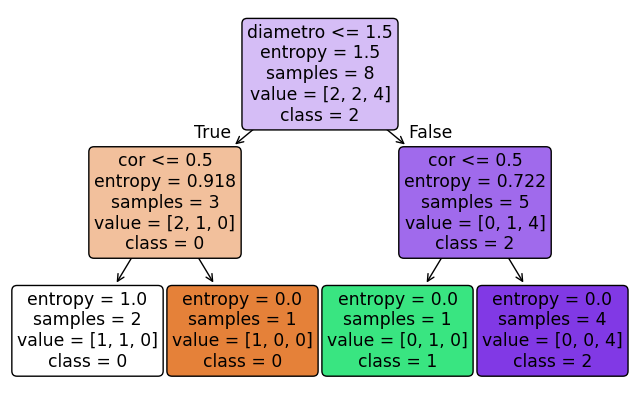

In [ ]:
#gerando o modelo
dt.fit(X, Y)


# plotando
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree_graph_to_png(dt, feature_names=['cor','diametro'], png_file_to_save='dt.png')

plt.figure(figsize=(8, 5))
plot_tree(dt,
          feature_names=['cor','diametro'],
          class_names=['0','1','2'],
          filled=True,
          rounded=True)
plt.show()

In [ ]:
d = np.array([[1, 100]])
#d=d.reshape(-1, 1)

print(f"Classe predita é a {dt.predict(d)[0]}")

Classe predita é a 2


#Um exemplo real

Objetivo: Prever a possibilidade de um candidato estar procurando um novo trabalho (sair da empresa atual)



Dataset: Esta base do Kaggle tem como objetivo entender os fatores de um empregado que deseja sair do trabalho atual. Dessa forma, o desafio é criar um modelo capaz prever se um candidato vai sair ou não da empresa.



In [ ]:
#@title Load Bib
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics


In [ ]:
#@title Load Dataset
url = 'https://raw.githubusercontent.com/dbguilherme/machinelearning/main/aug_train.csv'
df_train= pd.read_csv(url,encoding = "ISO-8859-1")


def preprocessing(df):
    df.drop(["enrollee_id"], axis=1, inplace=True)

    df.dropna(inplace=True)

    le = LabelEncoder()
    cols_to_le = ["gender","city","relevent_experience","enrolled_university","education_level","major_discipline","experience",
                  "company_size","company_type","last_new_job"]
    for col in cols_to_le:
        df[col] = le.fit_transform(df[col])
    return df
df_train_proc=preprocessing(df_train)

In [ ]:
df_train_proc.shape

(8955, 13)

In [ ]:
#apagar o rotulo
X = df_train_proc.drop("target", axis=1)



#cria um dataframe para o rotulo
y = df_train_proc["target"]

#divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.3)
X_train.shape

(6268, 12)

In [ ]:
#Cria classificador
dt = DecisionTreeClassifier(max_depth=5)
#Treina
dt.fit(X_train,y_train)

tree_graph_to_png(dt, feature_names=['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
      'experience', 'company_size', 'company_type', 'last_new_job',
      'training_hours'], png_file_to_save='dt2.png')
print(X_test.shape)
print(y_test.shape)

(2687, 12)
(2687,)


In [ ]:
#Faz a predição
y_pred=dt.predict(X_test)
#Calcula métricas
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      2276
         1.0       0.53      0.47      0.50       411

    accuracy                           0.86      2687
   macro avg       0.72      0.70      0.71      2687
weighted avg       0.85      0.86      0.85      2687



In [ ]:

for i, y in enumerate (dt.feature_importances_):
  print(f"{df_train_proc.columns[i]} ---- {y}")

city ---- 0.044083847297354255
city_development_index ---- 0.2718712703802181
gender ---- 0.013946662780277834
relevent_experience ---- 0.017457099765986868
enrolled_university ---- 0.023114143869646955
education_level ---- 0.03280366605080657
major_discipline ---- 0.019809831486253888
experience ---- 0.12495283671557296
company_size ---- 0.08816086313592149
company_type ---- 0.042037078159302424
last_new_job ---- 0.07049323454734728
training_hours ---- 0.2512694658113114


Pergunta: O que significa a precisão da classe 1.0?

Resposta:


### Pros e contras DT

#### Pros

1. Fácil de trabalhar

2. Importante para explorar os dados

3. Pode lidar com dados númericos e categóricos;

4. Considerado sem parâmetros de entrada.

#### Cons

1. Overfitting



# Atividade

A partir do dataset abaixo crie uma árvore de decisão e teste a melhor combinação de parâmetros

In [ ]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True




```
# Isto está formatado como código
```

## Dados de texto



 Use a função abaixo paras carregar o  dataset envolvendo discurso de ódio do [link](https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv)
```
Classes:
0 - hate speech
1 - offensive language
2 - neither
```
A- Explore o dataset, qual  é o número de features?

B- Divida  o conjunto em treino e teste (30%)

C- Aplique o classificador de árvore de decisão.



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dbguilherme/machinelearning/main/dataset/hate_speech.csv',delimiter=";")



#print(df['class'])
df.shape


(24783, 6)

In [ ]:
#Conta a frequência de cada palavra e faz a substituição
vectorizer = CountVectorizer()
dataset = vectorizer.fit_transform(df['tweet'])

In [ ]:
dataset

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 324050 stored elements and shape (24783, 35853)>

In [ ]:
y=df['class']

X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
X_train[0]
dt = DecisionTreeClassifier(criterion="entropy")

dt = dt.fit(X_train, y_train)
print(dt)
y_pred = dt.predict(X_test)



# #reportando as métricas
print(classification_report(y_test, y_pred))



DecisionTreeClassifier(criterion='entropy')
              precision    recall  f1-score   support

           0       0.26      0.20      0.23       420
           1       0.93      0.94      0.93      5782
           2       0.82      0.88      0.85      1233

    accuracy                           0.88      7435
   macro avg       0.67      0.67      0.67      7435
weighted avg       0.88      0.88      0.88      7435



In [ ]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 226976 stored elements and shape (17348, 35853)>